# 二分木（binary tree)
四分木（しぶんぎ、英: Quadtree）は、各内部ノードが4個までの子ノードを持つ木構造のデータ構造である。四分木は主に、2次元空間を再帰的に4つの象限または領域に分割するのに使われる。領域は四角形または矩形の場合もあるし、任意の形状の場合もある。([Wikipedia](https://ja.wikipedia.org/wiki/%E5%9B%9B%E5%88%86%E6%9C%A8))

![画像がないよ](https://upload.wikimedia.org/wikipedia/commons/8/8b/Point_quadtree.svg)

In [3]:
from graphviz import Digraph
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [4]:
class QuadTree():
    nodes = Digraph(format="png")
    nodes.attr("node", shape="circle")
    nodes.attr("graph", ordering="out")
    depth = 0
    
    @classmethod
    def clearGraph(cls):
        """
        グラフの初期化
        """
        cls.nodes = Digraph(format="png")
        cls.nodes.attr("node", shape="circle")
        cls.nodes.attr("graph", ordering="out")
        cls.depth = 0
    
    def __init__(self, point, width, d = 0):
        self.point = point
        self.width = width
        self.children = (np.array([None, None, None, None])).reshape((2,2))
        
        self.info = list(point)
        self.info.append(d)
        self.nodes.node(str(self.info), str(self.info))
        
    def makeTree(self, depth=0):
        for i, j in itertools.product(range(2), range(2)):
            child_width = (self.width[0]/2.0, self.width[1]/2.0)
            child_point = (self.point[0]+child_width[0]*i, self.point[1]+child_width[1]*j)
            self.children[i,j] = QuadTree(child_point, child_width, self.info[2]+1)
            self.nodes.edge(str(self.info), str(self.children[i,j].info))
            
            if depth != 0:
                self.children[i,j].makeTree(depth-1)
        
        self.depth = depth+1
                
    def search(self, point):
        node = self
        for i in range(self.depth):
            for i, j in itertools.product(range(2), range(2)):
                x = node.children[i,j].point[0]
                y = node.children[i,j].point[1]
                x_width = node.children[i,j].width[0]
                y_width = node.children[i,j].width[1]
                if (x <= point[0] < x+x_width) and (y <= point[1] < y+y_width):
                    node = node.children[i, j]
                    break
        return node

In [8]:
QuadTree.clearGraph()
root = QuadTree((0,0), (640,480), 0)
root.makeTree(1)

In [9]:
print(root.children)

[[<__main__.QuadTree instance at 0x7f6512bb1440>
  <__main__.QuadTree instance at 0x7f6512bb13b0>]
 [<__main__.QuadTree instance at 0x7f6512bb1050>
  <__main__.QuadTree instance at 0x7f6512ba1a70>]]


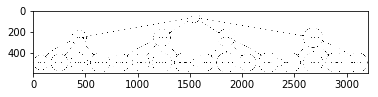

In [10]:
QuadTree.nodes.render("quad_tree")
img = plt.imread("quad_tree.png")
plt.imshow(img)

In [11]:
pt = (np.random.uniform(0, 640), np.random.uniform(0,480))
print(pt)
leaf = root.search(pt)

(209.96086444216857, 304.303089498857)


In [7]:
leaf.point+leaf.width

(80.0, 60.0, 80.0, 60.0)